<font color = green size =8>Análises descritivas</font>
## Importando bibliotecas e dados 2018

In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
%matplotlib inline

## Detalhando o que foi feito
### Ler o dataset de 2018
O dataset contem as colunas ano, mes, senador, Tipo da Despesa, Data da despesa e o valor reembolsado.
### Primeiras análises: gastos mensais totais
Para analisar os gastos mensais totais escolhi por avaliar a soma dos gastos. A média não seria uma boa estatística de avaliação porque há variação nos gastos dos senadores, e mesmo que seja com baixa variação não informaria o gasto total dos senadores.
### Primeiras análises: Gastos por categoria(tipo de despesa)
Há 7 tipos de despesas e é interessante ver qual categoria recebem mais gastos dos senadores. Esta análise mostrou qual foi a categoria que teve maior do ano inteiro de todos os senadores
### Segunda análise: Quais senadores gastam mais?
Como há muitos senadores escolhi os 5 primeiros colocados (gastam mais), enfatizando o primeiro colocado.
### Últimas análises: Analisando o primeiro colocado por mês
O primeiro colocado dos senadores tem uma avaliação priorizada aqui. Nesta análise quis avaliar qual mês ele gastou mais
### Últimas análises: Analisando o primeiro colocado por categoria
## Conclusão
Nesta análise exploratória veremos quais foram os gastos totais dos senadores por mês e por categoria. Veremos quais são os cincos senadores que mais gastaram, e por fim, veremos quais são os gastos mensais e por categoria do senador que mais gastou no ano.

## Contando as histórias
### 2018

In [2]:
df  = pd.read_csv('dados/despesa_ceaps_2018_alterado.csv', sep =';')
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,DATA,VALOR_REEMBOLSADO
0,2018,1,ACIR GURGACZ,Aluguel Imoveis,02/01/2018,6000.00
1,2018,1,ACIR GURGACZ,Passagens,02/01/2018,274.99
2,2018,1,ACIR GURGACZ,Passagens,02/01/2018,1094.29
3,2018,1,ACIR GURGACZ,Passagens,24/01/2018,1553.99
4,2018,2,ACIR GURGACZ,Aluguel Imoveis,01/02/2018,6000.00


### Qual foi o mês que teve o maior gasto?

In [9]:
cores = ['gray' for x in range(12)]
cores[-1] = 'purple'
fig = px.bar(df.groupby('MES').sum(), x = df.groupby('MES').sum().index,y = 'VALOR_REEMBOLSADO',
             text_auto = "0.3s", title = "Valor Reembolsado total por mês durante o ano de 2018", 
             labels= {'VALOR_REEMBOLSADO':'VALOR REEMBOLSADO', 'x':'MESES'}  )
fig.update_traces(marker_color=cores)
fig.add_annotation(x = 11.5, y = 2.892e6,text =  '<b>Dezembro foi o mês que <br>teve o maior gasto total')
fig.show()

### Em qual categoria teve o maior gasto?

In [4]:
cores = ['gray' for x in range(7)]
cores[4] = 'purple'
cores[-1] = 'blue'
fig = px.bar(df.groupby('TIPO_DESPESA').sum(), x = df.groupby('TIPO_DESPESA').sum().index,y = 'VALOR_REEMBOLSADO',
             text_auto = "0.3s", title = "Valor Reembolsado total por categoria durante o ano de 2018", 
             labels= {'VALOR_REEMBOLSADO':'VALOR REEMBOLSADO', 'x':'CATEGORIA'}  )
fig.update_traces(marker_color=cores)
fig.add_annotation(x = 'Passagens', y = 6.16e6,text =  '<b>Passagens foi a categoria <br>que teve o maior gasto total')
fig.add_annotation(x = 'seguranca', y = 583e3,text =  '<b>Seguranca teve o<br> menor gasto total')
fig.show()

### Qual foi o senador que mais gastou?

In [5]:
df_senador = pd.DataFrame(df.groupby('SENADOR').sum())
df_senador =  df_senador.nlargest(5, ['VALOR_REEMBOLSADO'])

In [6]:
cores = ['gray' for x in range(5)]
cores[0] = 'purple'

fig = px.bar(df_senador, x = df_senador.index, y='VALOR_REEMBOLSADO',
            text_auto = '0.3s',title = 'Cinco senadores que mais gastaram no ano de 2018',
            labels = {'VALOR_REEMBOLSADO':'VALOR REEMBOLSADO', 'SENADOR':'SENADOR(A)'})
fig.update_traces(marker_color = cores)
fig.add_annotation(x ='EDUARDO BRAGA', y = 530e3, text ='<b>Eduado Braga foi o <br> senador que mais gastou')
fig.show()

### Quais foram os maiores tipo de gastos do Eduado Braga?

In [7]:
dfeduardo = df[df['SENADOR'].isin(['EDUARDO BRAGA'])]
dfeduardo

,ANO,MES,SENADOR,TIPO_DESPESA,DATA,VALOR_REEMBOLSADO
4485,2018,1,EDUARDO BRAGA,Apoio parlamentar,04/01/2018,20000.00
4486,2018,1,EDUARDO BRAGA,Apoio parlamentar,05/01/2018,2500.00
4487,2018,1,EDUARDO BRAGA,Atividade Parlamentar,30/01/2018,1000.00
4488,2018,1,EDUARDO BRAGA,Atividade Parlamentar,03/01/2018,12000.00
4489,2018,1,EDUARDO BRAGA,Viagens,25/01/2018,692.43
...,...,...,...,...,...,...
4609,2018,11,EDUARDO BRAGA,Passagens,24/11/2018,2011.16
4610,2018,11,EDUARDO BRAGA,Passagens,27/11/2018,2009.38
4611,2018,12,EDUARDO BRAGA,Apoio parlamentar,04/12/2018,22324.62
4612,2018,12,EDUARDO BRAGA,Apoio parlamentar,03/12/2018,2500.00


In [8]:
cores = ['gray' for x in range(12)]
cores[2] = 'purple'
fig = px.bar(dfeduardo.groupby('MES').sum(), x = dfeduardo.groupby('MES').sum().index,y = 'VALOR_REEMBOLSADO',
             text_auto = "0.3s", title = "Valor Reembolsado total por mês durante o ano de 2018 pelo senador Eduardo Braga", 
             labels= {'VALOR_REEMBOLSADO':'VALOR REEMBOLSADO', 'x':'MESES'}  )
fig.update_traces(marker_color=cores)
fig.add_annotation(x = 3, y = 84.6e3,text =  '<b>Março foi o mês que Eduardo Braga <br>teve o maior gasto total')
fig.show()

In [9]:
cores = ['gray' for x in range(4)]
cores[0] = 'purple'
cores[-1] = 'blue'
fig = px.bar(dfeduardo.groupby('TIPO_DESPESA').sum(), x = dfeduardo.groupby('TIPO_DESPESA').sum().index,y = 'VALOR_REEMBOLSADO',
             text_auto = "0.3s", title = "Valor Reembolsado total por categoria durante o ano de 2018 por Eduardo Braga", 
             labels= {'VALOR_REEMBOLSADO':'VALOR REEMBOLSADO', 'x':'CATEGORIA'}  )
fig.update_traces(marker_color=cores)
fig.add_annotation(x = 'Apoio parlamentar', y = 368e3,
                   text =  '<b>Apoio Parlamentar foi a categoria que <br>Eduardo Braga teve o maior gasto total')
fig.add_annotation(x = 'Viagens', y = 25.6e3,text =  '<b>Viagens Eduardo Braga teve o<br> menor gasto total')
fig.show()

## Conjunto de gráficos em ordem

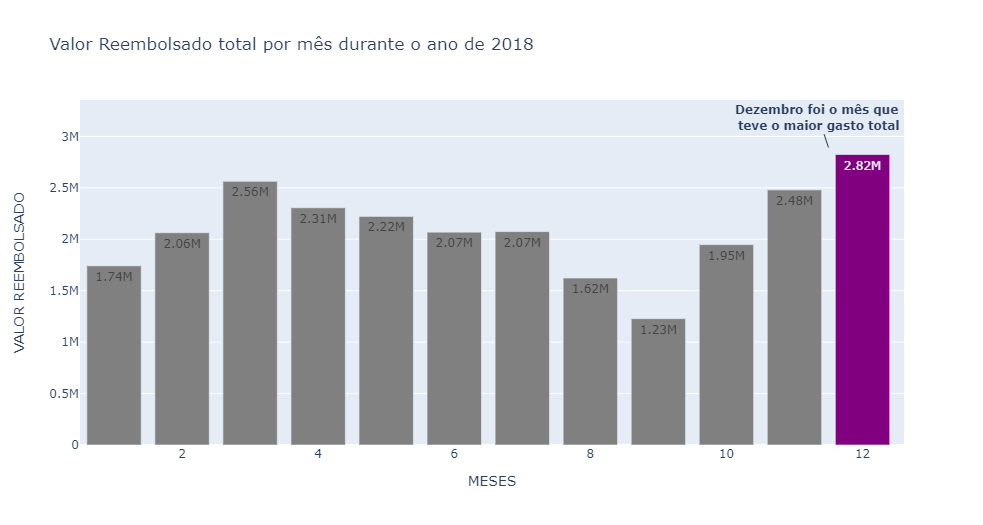

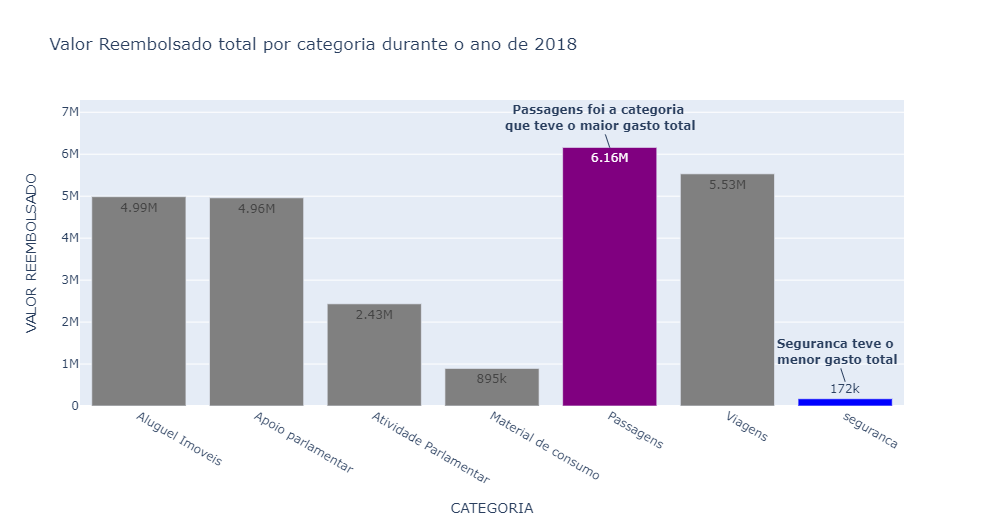


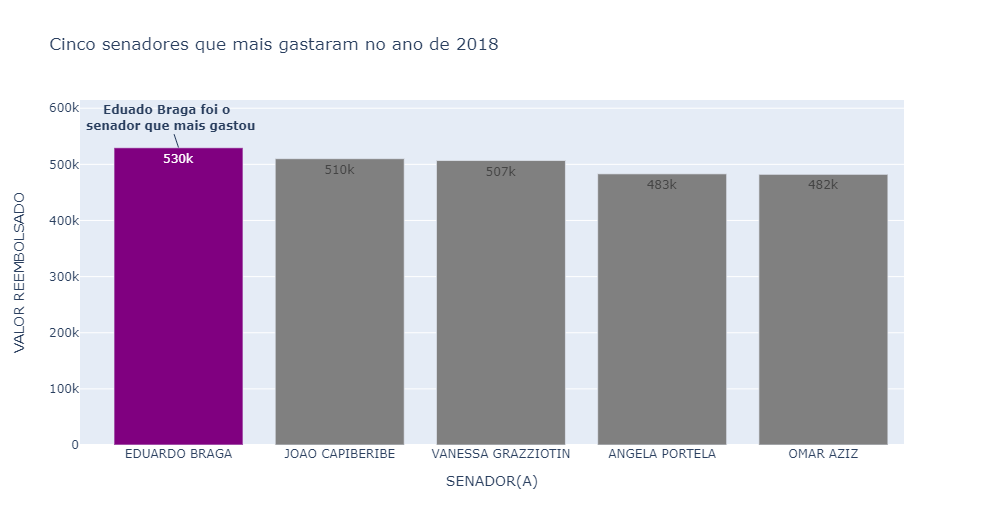

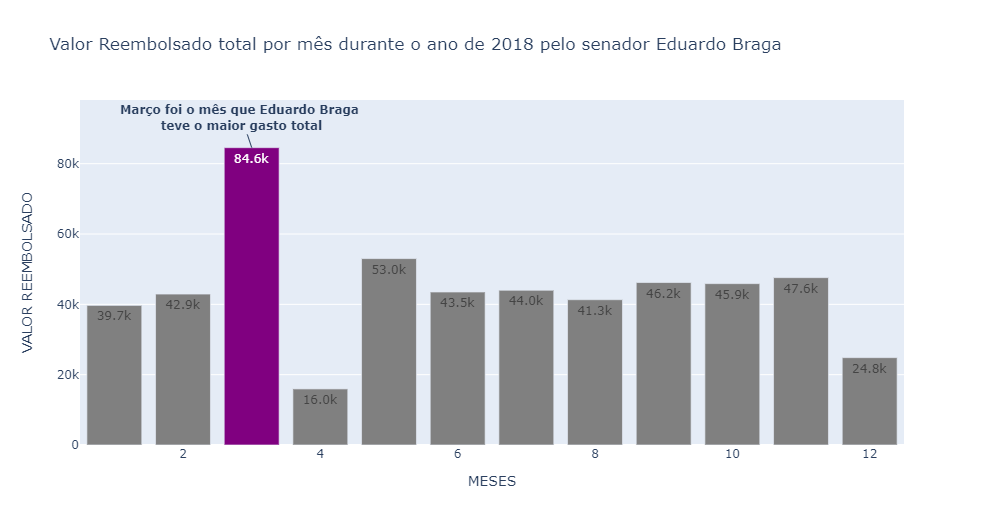

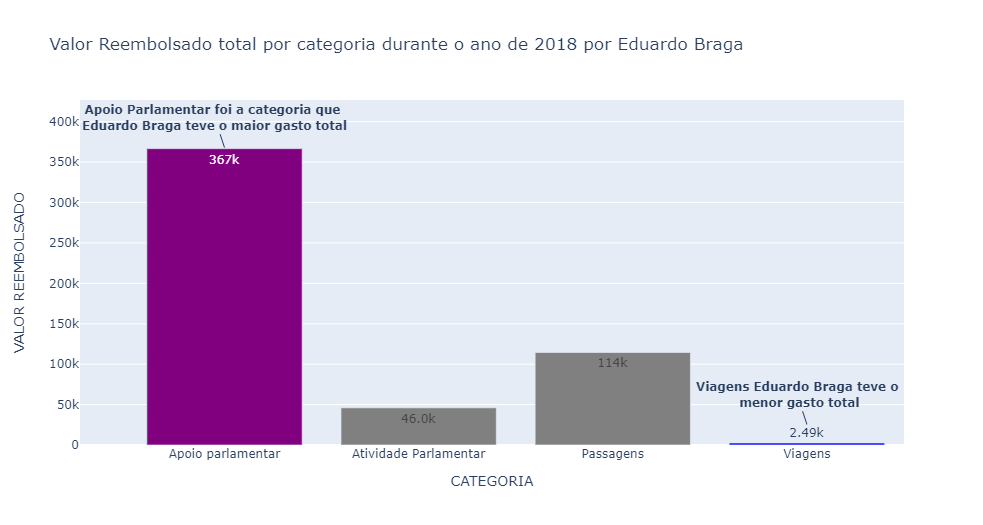